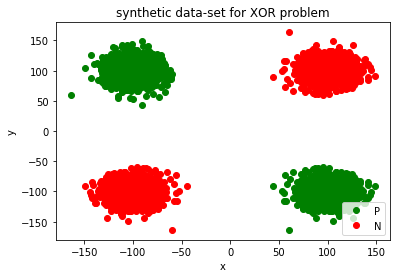

In [0]:
import numpy as np
######################
# Create random data
#####################
Positive = np.random.normal(100,15,1000)
Negative = np.random.normal(-100,15,1000)
PN=[(x,y) for x,y in zip(Positive,Negative)] 
NP=[(x,y) for x,y in zip(Negative,Positive)]
PP=[(x,y) for x,y in zip(Positive,-1*(Negative))]
NN=[(x,y) for x,y in zip(-1*(Positive),1*(Negative))]


N_class = PN + NP # green(negative)
P_class = PP + NN # red(positive)

X = np.concatenate([N_class, P_class])
d_neg = np.full((2000,1),-1)
d_pos = np.full((2000,1),1)

X = np.concatenate([N_class, P_class])
# change the dtype to 'float64' 

y = np.concatenate([d_neg, d_pos])

########################
# Data Visualization
########################
import matplotlib.pyplot as plt
plt.plot([x for x,y in N_class], [y for x,y in N_class], 'go', label='P')
plt.plot([x for x,y in P_class], [y for x,y in P_class], 'ro', label='N')

plt.title('synthetic data-set for XOR problem')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

plt.show()

# ساده ترین مدل یک مدل مک لاچ هست که مابین دوخط را اره و بیرون را نه تشخیص میدهد 


 # با شبکه چند لایه هم میتوان مسئله را هر کرد 


#از هردو روش استفاده میکنیم

In [0]:


def Mcclutch(p1,p2):
  if p1 == -1 or p2 == -1:
    return -1
  else:
    return 1


# x2 + x1 -120 = 0
# -x2 -x1 -50 = 0

w1 = np.array([[1,1]])
w2 = -w1
b1 = 120
b2 = 50

# Testing
test = np.array([[-100,100],[100,-100],[100,100],[-100,-100]])


# Predicting
u=0
for i in range(len(test)):
  u = (test[i].dot(w1.T) + b1)
  u2 = (test[i].dot(w2.T) + b2)

  p1 = step(u)
  p2 = step(u2)
  print("My Test: {} , Predict: {} ".format(test[i],Mcclutch(p1,p2)))
  


My Test: [-100  100] , Predict: 1 
My Test: [ 100 -100] , Predict: 1 
My Test: [100 100] , Predict: -1 
My Test: [-100 -100] , Predict: -1 


In [0]:
def step(x):
    print(x)
    if x.all() < 1:
      return -1
    else:
      return 1

In [0]:
X

array([[  93.81695344,  -67.37046697],
       [  98.88986413,  -97.17586572],
       [  86.06594612, -109.8015282 ],
       ...,
       [-119.66717163,  -90.09139806],
       [-110.81793912,  -71.26055675],
       [-113.12245492, -112.00441308]])

In [0]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x): 
	return np.tanh(x) 

def tanh_derivative(x): 
		return 1.0 - tanh(x) ** 2
    
# Derivative of Sigmoid Function
def derivative_sigmoid(x):
    return x * (1 - x)

In [0]:
# number of training iterations
epoch = 10000
learning_rate = 0.1

شبکه از یک لایه خروجی، سه لایه مخفی و همچنین یک لایه ورودی است
لایه ورودی مختصات را میگیرد

In [0]:
# number of features in the input dataset
d_in = X.shape[1] 

# hidden layer dimension
d_h = 7

# output layer dimension
d_out = 1

مقداردهی وزن و بایاس

In [0]:
np.random.seed(100)
wh = np.random.uniform(size=(d_in, d_h))
bh = np.random.uniform(size=(1, d_h))
wout = np.random.uniform(size=(d_h, d_out))
bout = np.random.uniform(size=(1, d_out))
print("Weight Matrix: \n",wh)
print("\nBias Matrix: \n",bh)
print("\nWeight output Matrix: \n",wout)
print("\nBias output Matrix: \n",bout)

Weight Matrix: 
 [[0.54340494 0.27836939 0.42451759 0.84477613]
 [0.00471886 0.12156912 0.67074908 0.82585276]]

Bias Matrix: 
 [[0.13670659 0.57509333 0.89132195 0.20920212]]

Weight output Matrix: 
 [[0.18532822]
 [0.10837689]
 [0.21969749]
 [0.97862378]]

Bias output Matrix: 
 [[0.81168315]]


فرآیند یادگیری به تعداد تکرار مشخص شده انجام میگیرد

یک بار ورودی ها با ماتریس وزن ضرب داخلی شده و با بایاس ضرب میشوند

سپس با استفاده از تابع فعالیت و ماتریس وزن لایه آخر و بایاس پیش بینی میکنیم

مرحله بعد انتشار به عقب است که با استفاده از مشتق تابع فعالیت و الگوریتم گرادیان میزان اصلاح ماتریس وزت ها را بدست آورده و آنها را آپدیت میکنیم

این کار به تعداد تکرار انجام میشود




In [0]:
np.set_printoptions(suppress=True) #prevent numpy exponential 
import progressbar
from time import sleep
bar = progressbar.ProgressBar(maxval=epoch, \
    widgets=[progressbar.Bar('▉', '[', ']'), ' ', progressbar.Percentage()])
bar.start()
for i in range(epoch):
    bar.update(i+1)

    # Forward pass h = x*w + b
    h = sigmoid(X.dot(wh) + bh) 
    y_pred = tanh(h.dot(wout) + bout)
    
    # Compute and print loss
    # loss = (y_pred - y).sum()
    # if i % 5000 == 0:
    #     print('\nEpoch', i, ' loss is:', loss)

    # Backpropagation output layer by using activation function derivate
    grad_y_pred = (y - y_pred) * tanh_derivative(y_pred)
    grad_wout = h.T.dot(grad_y_pred)
    grad_bout = np.sum(grad_y_pred, axis=0, keepdims=True)

    # Backpropagation hidden layer by using gradient of network prediction
    grad_h = grad_y_pred.dot(wout.T) * tanh_derivative(h)
    grad_wh = X.T.dot(grad_h)
    grad_bh = np.sum(grad_h, axis=0, keepdims=True)

    # Update output layer weight matrix
    wout += grad_wout * learning_rate

    # Update output layer bias matrix
    bout += grad_bout * learning_rate

    # Update hidden layer weight matrix
    wh += grad_wh * learning_rate

    # Update hidden layer weight matrix
    bh += grad_bh * learning_rate
    
bar.finish() 

[                                                                        ] N/A%/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
[▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉] 100%


In [0]:
test = np.array(([
       [ 100, -100],#green
       [ -100, -100],#red
       ]))

f = tanh(test.dot(wh) + bh) 
pred = tanh(f.dot(wout) + bout)

print(pred)

[[ 1.]
 [-1.]]


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score

def modelEvaluation(predictions, y_test_set):
    #Print model evaluation to predicted result 
    
    print ("\nAccuracy on test set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print("---------------------------")
    print ("\nAUC score : {:.4f}".format(roc_auc_score(y_test_set, predictions)))
    print("---------------------------")
    print ("\nClassification report : \n", metrics.classification_report(y_test_set, predictions))
    print("---------------------------")
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_set, predictions))
    print("\n---------------------------\n")

In [0]:
for i in range(len(y_pred)):
  if y_pred[i] > 0:
    y_pred[i] = 1
  else:
    y_pred[i] = -1

modelEvaluation(y_pred, y)


Accuracy on test set: 0.5000
---------------------------

AUC score : 0.5000
---------------------------

Classification report : 
               precision    recall  f1-score   support

          -1       0.50      1.00      0.67      2000
           1       0.00      0.00      0.00      2000

    accuracy                           0.50      4000
   macro avg       0.25      0.50      0.33      4000
weighted avg       0.25      0.50      0.33      4000

---------------------------

Confusion Matrix : 
 [[2000    0]
 [2000    0]]

---------------------------



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
